📊 Frecvența dominantă: 0.020000 Hz
📈 Perioada principală: 50.00 pași de timp
🔍 Window size recomandat: 100 pași


/tmp/ipykernel_153506/1733193355.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(my_file, delim_whitespace=True, comment='#', names=["Step", "T", "E_KS", "E_tot", "Vol", "P"])


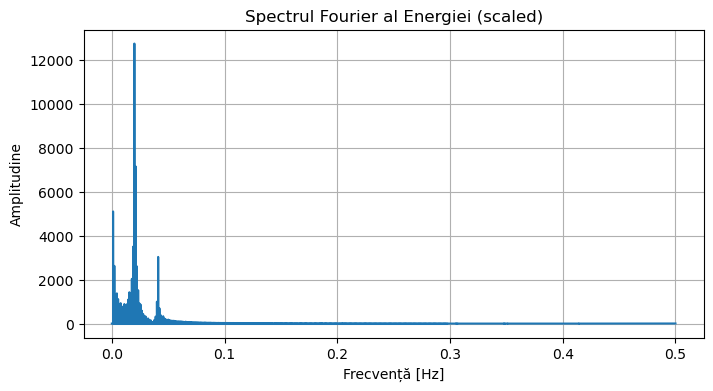

In [1]:
import numpy as np
from scipy.fft import rfft, rfftfreq
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# === 1. Citești fișierul tău ===
my_file = "./pentilfuran.MDE"
df = pd.read_csv(my_file, delim_whitespace=True, comment='#', names=["Step", "T", "E_KS", "E_tot", "Vol", "P"])

# Varianta optimizată pentru filtrare
dfs = [df[df['Step'] == i].iloc[1:901] for i in range(1, 100)]
df_data = pd.concat(dfs, ignore_index=True)

# === 2. Extragi energia totală ===
en = df_data['E_tot'].values

# === 3. Scaling ===
scaler = MinMaxScaler()
energy_scaled = scaler.fit_transform(en.reshape(-1, 1)).flatten()

# === 4. Parametru dt (pasul temporal) ===
# Dacă fiecare rând e o măsurătoare la un pas de timp constant, dt = 1
dt = 1  

# === 5. FFT ===
y = energy_scaled - np.mean(energy_scaled)
N = len(y)
yf = rfft(y)
xf = rfftfreq(N, dt)

# Ignorăm frecvența 0 (offset DC)
idx_max = np.argmax(np.abs(yf[1:])) + 1
f0 = xf[idx_max]       # frecvența dominantă
T0 = 1 / f0            # perioada în pași de timp

print(f"📊 Frecvența dominantă: {f0:.6f} Hz")
print(f"📈 Perioada principală: {T0:.2f} pași de timp")
print(f"🔍 Window size recomandat: {int(T0*2)} pași")

# === 6. Plot spectru ===
plt.figure(figsize=(8,4))
plt.plot(xf, np.abs(yf))
plt.title("Spectrul Fourier al Energiei (scaled)")
plt.xlabel("Frecvență [Hz]")
plt.ylabel("Amplitudine")
plt.grid(True)
plt.show()
